In [47]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score
import os
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
ds_version = "V1_0"
root_data_path = os.path.join("..", "data", ds_version)
data_path = os.path.join(root_data_path, "metadata")

In [93]:
# focus + no focus
file_name = "effnet_scenery_prediction-road_scenery-20240613_111434.csv"

# focus only
# file_name = "effnet_scenery_prediction-road_scenery-20240613_111511.csv"

In [94]:
pred = pd.DataFrame()
# surface = file_name.split("_")[0]
print(f"reading {file_name}")
df = pd.read_csv(os.path.join(data_path, file_name))
# df["surface_pred"] = surface
pred = pd.concat([pred, df])

pred.rename(columns={"Image": "image_id", "Prediction": "scenery_probability", "Level_0": "scenery_label_pred"}, inplace=True)

reading effnet_scenery_prediction-road_scenery-20240613_111434.csv


In [95]:
pred

,image_id,scenery_probability,Level,scenery_label_pred,is_in_validation
0,132129682207991,0.987863,scenery,1_1_road__1_1_parking_area,0.0
1,132129682207991,0.001883,scenery,1_1_road__1_1_rails_on_road,0.0
2,132129682207991,0.001843,scenery,1_1_road__1_1_road_general,0.0
3,132129682207991,0.001037,scenery,1_2_cycleway__1_2_hochbord,0.0
4,132129682207991,0.002496,scenery,1_2_cycleway__1_2_lane,0.0
...,...,...,...,...,...
8991,935618673917562,0.000331,scenery,1_4_path__1_4_path_unspecified,1.0
8992,935618673917562,0.000205,scenery,1_4_path__1_4_trampling_trail,1.0
8993,935618673917562,0.018428,scenery,2_1_no_focus__2_1_other,1.0
8994,935618673917562,0.000721,scenery,2_1_no_focus__2_1_vertical,1.0


In [96]:
# the prediction holds a value for each surface and a class probability. Only keep the highest prob.
idx = pred.groupby("image_id")["scenery_probability"].idxmax()
pred = pred.loc[idx]
pred


,image_id,scenery_probability,Level,scenery_label_pred,is_in_validation
4584,102376292162352,0.694755,scenery,1_4_path__1_4_path_unspecified,1.0
4089,103194292097226,0.872787,scenery,1_3_pedestrian__1_3_sidewalk,0.0
505,103629748692983,0.209697,scenery,2_1_no_focus__2_1_vertical,0.0
509,104379059096578,0.975658,scenery,1_1_road__1_1_road_general,0.0
2747,105366992004127,0.785459,scenery,1_2_cycleway__1_2_lane,1.0
...,...,...,...,...,...
5962,5763709106992911,0.867313,scenery,1_4_path__1_4_path_unspecified,0.0
8891,5937309349699591,0.936821,scenery,2_2_no_street__2_2_all,0.0
2473,6111230058996346,0.963332,scenery,1_2_cycleway__1_2_hochbord,0.0
8917,6273449889374724,0.968167,scenery,2_2_no_street__2_2_all,0.0


In [97]:
annot = pd.read_csv(os.path.join(data_path, "annotations_scenery.csv"))
annot.rename(columns={"road_scenery": "scenery_label_true"}, inplace=True)

In [98]:
df = pred.set_index("image_id").join(annot[["image_id", "scenery_label_true"]].set_index("image_id"), how="left")
df

,scenery_probability,Level,scenery_label_pred,is_in_validation,scenery_label_true
image_id,,,,,
102376292162352,0.694755,scenery,1_4_path__1_4_path_unspecified,1.0,1_4_path__1_4_path_unspecified
103194292097226,0.872787,scenery,1_3_pedestrian__1_3_sidewalk,0.0,1_3_pedestrian__1_3_sidewalk
103629748692983,0.209697,scenery,2_1_no_focus__2_1_vertical,0.0,1_1_road__1_1_road_general
104379059096578,0.975658,scenery,1_1_road__1_1_road_general,0.0,1_1_road__1_1_road_general
105366992004127,0.785459,scenery,1_2_cycleway__1_2_lane,1.0,1_2_cycleway__1_2_lane
...,...,...,...,...,...
5763709106992911,0.867313,scenery,1_4_path__1_4_path_unspecified,0.0,1_4_path__1_4_path_unspecified
5937309349699591,0.936821,scenery,2_2_no_street__2_2_all,0.0,2_2_no_street__2_2_all
6111230058996346,0.963332,scenery,1_2_cycleway__1_2_hochbord,0.0,1_2_cycleway__1_2_hochbord


In [99]:
# exclude not recognizable
# df = df[df.surface_true.notna()]

In [100]:
df.groupby(["image_id"]).size().sort_values(ascending=False)

image_id
168865118398310     2
102376292162352     1
378603366843295     1
355215629594925     1
359091202388839     1
                   ..
158531406824852     1
159117356145022     1
159375323477648     1
160338122707486     1
7124459054305360    1
Length: 691, dtype: int64

In [101]:
df.groupby(["scenery_label_true"]).size()

scenery_label_true
1_1_road__1_1_parking_area                5
1_1_road__1_1_rails_on_road              33
1_1_road__1_1_road_general               77
1_2_cycleway__1_2_hochbord               96
1_2_cycleway__1_2_lane                   47
1_3_pedestrian__1_3_pedestrian_area      39
1_3_pedestrian__1_3_railway_platform     17
1_3_pedestrian__1_3_sidewalk             37
1_4_path__1_4_path_unspecified          114
1_4_path__1_4_trampling_trail            13
2_1_no_focus__2_1_other                  74
2_1_no_focus__2_1_vertical               38
2_2_no_street__2_2_all                  102
dtype: int64

In [102]:
df_valid = df[df.is_in_validation == 1]
df_train = df[df.is_in_validation == 0]

In [103]:
# df.groupby(["is_in_validation", "scenery_label_true"]).size().to_csv("test.csv")

## Global measures

In [104]:
def compute_measures(true_label, pred_label):
    m = {
    "accuracy": sum(true_label == pred_label) / len(true_label),
    # "correlation": np.corrcoef(true_float, pred_float)[0, 1],
    # "r_square": r2_score(true_float, pred_float),
    # "mse": mean_squared_error(true_float, pred_float)
    }
    # m["rmse"] = np.sqrt(m["mse"])
    return m

In [105]:
# all
gm = compute_measures(df.scenery_label_true, df.scenery_label_pred)
gm_valid = compute_measures(df_valid.scenery_label_true, df_valid.scenery_label_pred)
gm_train = compute_measures(df_train.scenery_label_true, df_train.scenery_label_pred)
pd.concat([pd.Series(gm, name="all"), pd.Series(gm_valid, name="validation"), pd.Series(gm_train, name="train")], axis=1).round(2)

,all,validation,train
accuracy,0.89,0.66,0.95


## Measures by surface class

In [72]:
# all
# gm_surface = pd.DataFrame()
# for surface in df.surface_true.unique():
#     df_ = df[df.surface_true == surface]
#     gm = compute_measures(df_.quality_float_true, df_.quality_float_pred)
#     gm_surface = pd.concat([gm_surface, pd.Series(gm, name=surface)], axis=1)

# gm_surface.round(2)

In [73]:
# all
# gm_surface = pd.DataFrame()
# for surface in df.surface_true.unique():
#     df_ = df[df.surface_true == surface]
#     gm = compute_measures(df_.quality_float_true, df_.quality_float_pred)
#     gm_surface = pd.concat([gm_surface, pd.Series(gm, name=surface)], axis=1)

# gm_surface.round(2)

In [74]:
# only validation
# gm_surface = pd.DataFrame()
# for surface in df_valid.surface_true.unique():
#     df_ = df_valid[df_valid.surface_true == surface]
#     gm = compute_measures(df_.quality_float_true, df_.quality_float_pred)
#     gm_surface = pd.concat([gm_surface, pd.Series(gm, name=surface)], axis=1)

# gm_surface.round(2)

## compare float values

In [106]:
df = df_valid
# df = df_train
df

,scenery_probability,Level,scenery_label_pred,is_in_validation,scenery_label_true
image_id,,,,,
102376292162352,0.694755,scenery,1_4_path__1_4_path_unspecified,1.0,1_4_path__1_4_path_unspecified
105366992004127,0.785459,scenery,1_2_cycleway__1_2_lane,1.0,1_2_cycleway__1_2_lane
106106185328228,0.694138,scenery,1_1_road__1_1_road_general,1.0,1_1_road__1_1_road_general
106613138155354,0.620872,scenery,2_2_no_street__2_2_all,1.0,2_1_no_focus__2_1_other
108861071778781,0.586478,scenery,1_1_road__1_1_road_general,1.0,1_1_road__1_1_road_general
...,...,...,...,...,...
1359811021067404,0.496925,scenery,1_2_cycleway__1_2_hochbord,1.0,1_2_cycleway__1_2_hochbord
2068915133259008,0.974718,scenery,1_3_pedestrian__1_3_pedestrian_area,1.0,1_3_pedestrian__1_3_pedestrian_area
2967778960131761,0.814523,scenery,1_2_cycleway__1_2_lane,1.0,1_2_cycleway__1_2_lane


In [76]:
# Plot
# np.random.seed(5)
# colors = {surface_type: np.random.rand(3,) for surface_type in df.surface_true.unique()}

# sns.scatterplot(data=df, x="quality_float_true", y="quality_float_pred", hue="surface_true", palette=colors, legend="full")
# plt.xlabel('True')
# plt.ylabel('Pred')
# plt.title('True vs. Pred quality by surface')
# plt.show()


In [77]:
# sns.set_style("whitegrid")

# # Create a FacetGrid
# g = sns.FacetGrid(df, col="surface_true", col_wrap=3)

# # Map scatter plot for each surface type
# g.map(sns.scatterplot, "quality_float_true", "quality_float_pred")

# plt.show()

#### Hom much do the deviate?

In [78]:
# df["deviation"] = df.quality_float_true - df.quality_float_pred

**Overall**

In [79]:
# df.deviation.hist(bins=20)

**by surface**

In [80]:
# # Create a FacetGrid for histograms
# g_hist = sns.FacetGrid(df, col="surface_true", col_wrap=3)

# # Map histogram for deviation for each surface type
# g_hist.map(plt.hist, "deviation", color='green', density=True, bins=20)

# plt.show()

## compare classes

In [124]:
selected_classes = {
        '1_1_road': [
            '1_1_parking_area',
            '1_1_rails_on_road',
            '1_1_road_general',
        ],
        '1_2_cycleway': [
            '1_2_hochbord',
            '1_2_lane',
        ],
        '1_3_pedestrian': [
            '1_3_pedestrian_area',
            '1_3_railway_platform',
            '1_3_sidewalk',
        ],
        '1_4_path': [
            '1_4_path_unspecified',
            '1_4_trampling_trail',
        ],
        '2_1_no_focus': [
            '2_1_other',
            '2_1_vertical',
        ],
        '2_2_no_street': [
            '2_2_all'
        ],
    }

valid_labels = []
for key, values in selected_classes.items():
    for value in values:
        label = key + '__' + value
        valid_labels.append(label)

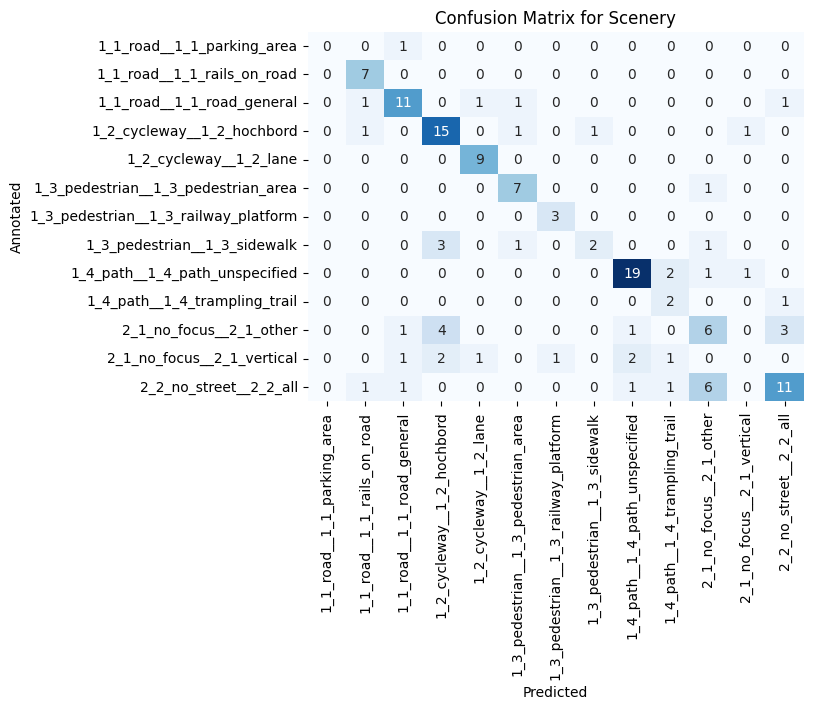

In [125]:
# Plotting the confusion matrix using seaborn heatmap

cm = confusion_matrix(df.scenery_label_true, df.scenery_label_pred, labels=valid_labels)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=valid_labels,
            yticklabels=valid_labels)
plt.title(f"Confusion Matrix for Scenery")
plt.xlabel("Predicted")
plt.ylabel("Annotated")
plt.show()

In [122]:
df[df.scenery_label_true.isin(valid_labels)]

,scenery_probability,Level,scenery_label_pred,is_in_validation,scenery_label_true
image_id,,,,,
102376292162352,0.694755,scenery,1_4_path__1_4_path_unspecified,1.0,1_4_path__1_4_path_unspecified
105366992004127,0.785459,scenery,1_2_cycleway__1_2_lane,1.0,1_2_cycleway__1_2_lane
106106185328228,0.694138,scenery,1_1_road__1_1_road_general,1.0,1_1_road__1_1_road_general
108861071778781,0.586478,scenery,1_1_road__1_1_road_general,1.0,1_1_road__1_1_road_general
109309371233729,0.918955,scenery,1_3_pedestrian__1_3_pedestrian_area,1.0,1_3_pedestrian__1_3_pedestrian_area
...,...,...,...,...,...
1316011592154091,0.923964,scenery,1_2_cycleway__1_2_lane,1.0,1_2_cycleway__1_2_lane
1359811021067404,0.496925,scenery,1_2_cycleway__1_2_hochbord,1.0,1_2_cycleway__1_2_hochbord
2068915133259008,0.974718,scenery,1_3_pedestrian__1_3_pedestrian_area,1.0,1_3_pedestrian__1_3_pedestrian_area


In [126]:
# Extract predicted and ground truth values

class_precision = precision_score(df[df.scenery_label_true.isin(valid_labels)].scenery_label_true, df[df.scenery_label_true.isin(valid_labels)].scenery_label_pred, average='weighted')
class_recall = recall_score(df[df.scenery_label_true.isin(valid_labels)].scenery_label_true, df[df.scenery_label_true.isin(valid_labels)].scenery_label_pred, average='weighted')

print(f"Count: {len(df)}")
print(f"Precision: {round(class_precision, 2)}")
print(f"Recall: {round(class_recall, 2)}")
print("------------------------")


Count: 139
Precision: 0.63
Recall: 0.66
------------------------


/Users/edith/git/SurfaceAI/classification_models/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
# all images that were incorrectly classified
misclassification = df[(df.scenery_label_pred != df.scenery_label_true) & (df.is_in_validation == 1)]

In [128]:
misclassification = misclassification.sort_values("image_id")
misclassification.reset_index( inplace=True)
os.makedirs(os.path.join(data_path, "model_predictions"), exist_ok=True)
misclassification[["image_id", "is_in_validation", "scenery_probability",
                   "scenery_label_true", "scenery_label_pred"]
                   ].to_csv(os.path.join(data_path, "model_predictions", "misclassification_scenery.csv"), index=False)

In [129]:
# store missclassified images in folder
import shutil

path = os.path.join(data_path, "model_predictions", "misclassified_images", "scenery")
os.makedirs(path, exist_ok=True)
for i in range(len(misclassification)):  # len(misclassification)
    img = misclassification.loc[i]
    img_path = os.path.join(root_data_path, "road_scenery")
    destination_folder_path = os.path.join(path, img.scenery_label_true, img.scenery_label_pred)
    os.makedirs(destination_folder_path, exist_ok=True)
    destination_path = os.path.join(destination_folder_path, f"{img.image_id}.jpg")
    folders = img.scenery_label_true.split("__")
    image_filename = os.path.join(img_path, folders[0], folders[1], f"{img.image_id}.jpg")
    shutil.copy(image_filename, destination_folder_path)

In [52]:
# store missclassified images in folder
# path = "/Users/alexandra/Nextcloud-HTW/SHARED/SurfaceAI/data/mapillary_images/training/V4/metadata/model_predictions/VGG16_V4_not_annotated/missclassified_wo_nostreet"
# os.makedirs(path, exist_ok=True)
# for image_id in misclassification_wo_nostreet.index:
#     destination_path = os.path.join(path, f"{image_id}.jpg")
#     image_filename = os.path.join("/Users/alexandra/Nextcloud-HTW/SHARED/SurfaceAI/data/mapillary_images/training/V4/unsorted_images", f"{image_id}.jpg")
#     shutil.copy(image_filename, destination_path)